In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

Number of frames: 1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_26133/1733498971.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


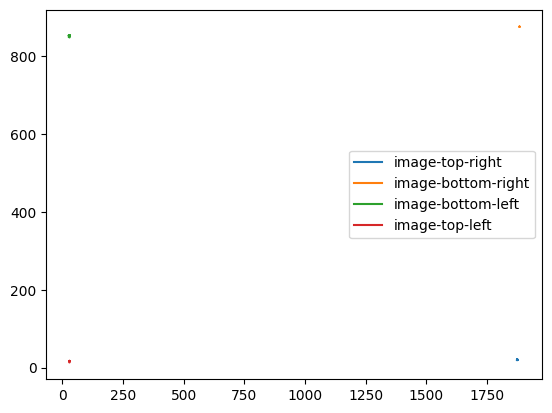

'\nBasically the image axes are:\norigin is at the top left corner\nincreases towards the right and bottom\n'

In [2]:
# Corner Data
filename = "/Users/pranathipoojary/Downloads/12_38_1_digitisation/12_38_1_corner_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))


plt.plot(df['pt1_cam1_X'], df['pt1_cam1_Y'])
plt.plot(df['pt2_cam1_X'], df['pt2_cam1_Y'])
plt.plot(df['pt3_cam1_X'], df['pt3_cam1_Y'])
plt.plot(df['pt4_cam1_X'], df['pt4_cam1_Y'])
plt.legend(['image-top-right', 'image-bottom-right', 'image-bottom-left', 'image-top-left'])
plt.title('Spatial Locs of 4 stationary corner points in the video')
plt.show()


'''
Basically the image axes in pixels are:
origin is at the top left corner
increases towards the right and bottom
'''

Number of frames: 1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_26133/625712821.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


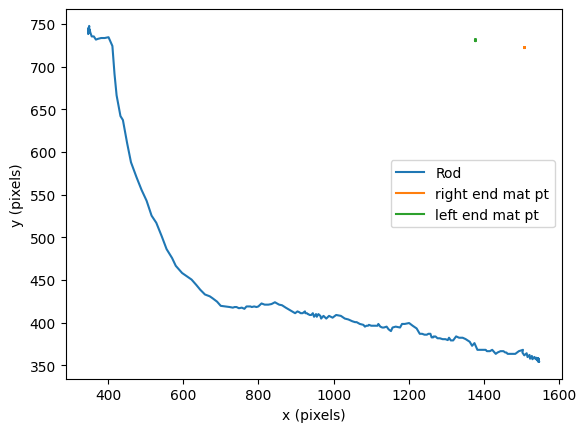

In [3]:
filename = "/Users/pranathipoojary/Downloads/12_38_1_digitisation/12_38_1_rod_mat2_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))

for i, col in enumerate(df.columns):
    if i%2==0:
        x = col
        y = col[:-1]+"Y"
        plt.plot(df[x], df[y])

plt.legend(['Rod', 'right end mat pt', 'left end mat pt'])
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.show()

There are 1155 nans in pt1_cam1_X
There are 1155 nans in pt1_cam1_Y
Number of frames: 1610
1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_26133/1492837023.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


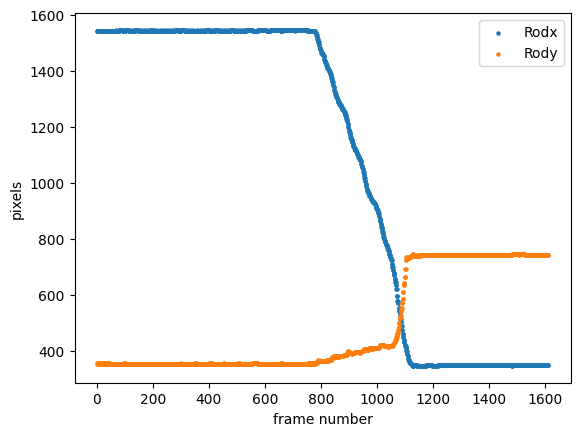

In [32]:
filename = "/Users/pranathipoojary/Downloads/12_38_1_digitisation/12_38_1_rod_data_xypts.csv"
df = pd.read_csv(filename)
for col in df.columns:
    print(f'There are {df[col].isna().sum()} nans in {col}')

df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))

x = range(1, len(df)+1)
print(len(x))
for col in df.columns:
    plt.scatter(x, df[col], s=5)
    # plt.plot(x, df[col])

plt.legend(['Rodx', 'Rody'])
plt.xlabel('frame number')
plt.ylabel('pixels')
plt.show()

In [6]:
# Obtaining pixel length of mat
right_end_X = df['pt2_cam1_X'].mean().item()
right_end_Y = df['pt2_cam1_Y'].mean().item()
left_end_X = df['pt3_cam1_X'].mean().item()
left_end_Y = df['pt3_cam1_Y'].mean().item()

len_of_mat = math.sqrt(((right_end_X-left_end_X)**2) + ((right_end_Y-left_end_Y)**2))

print("Right end of the mat coords:", round(right_end_X, 2), round(right_end_Y, 2))
print("Left end of the mat coords:", round(left_end_X, 2), round(left_end_Y, 2))
print("Length of mat in pixels:", round(len_of_mat, 2), "pixels")

Right end of the mat coords: 1506.66 722.01
Left end of the mat coords: 1376.36 730.33
Length of mat in pixels: 130.56 pixels


One pixel in mm: 0.31 mm


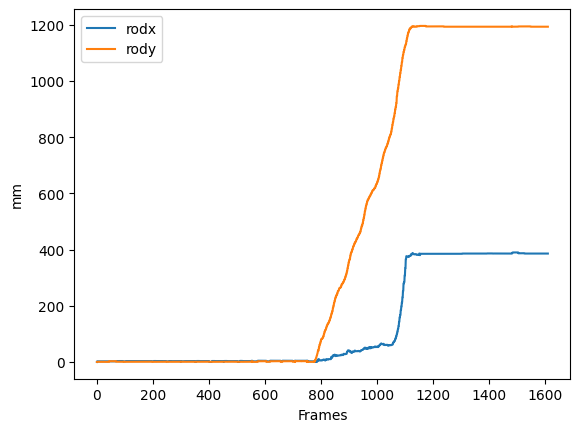

In [34]:
# Conversion from pixel to real cm
# Based on the mat being 40mm - need to check this measurement again
# Reference point is the rod in frame 1/1610; this will be 0, 0

len_of_mat_mm = 40

one_pix_in_mm = len_of_mat_mm/len_of_mat
print("One pixel in mm:", round(one_pix_in_mm, 2), "mm")

df_mm = df.copy(deep=True)
df_mm['pt1_cam1_X'] = abs(df_mm['pt1_cam1_X'] - df_mm['pt1_cam1_X'].iloc[0])
df_mm['pt1_cam1_Y'] = abs(df_mm['pt1_cam1_Y'] - df_mm['pt1_cam1_Y'].iloc[0])

x = range(1, len(df)+1)

plt.plot(x, df_mm['pt1_cam1_Y'])
plt.plot(x, df_mm['pt1_cam1_X'])

plt.legend(['Rod'])
plt.xlabel('Frames')
plt.ylabel('mm')
plt.legend(['rodx', 'rody'])
plt.show()